<a href="https://colab.research.google.com/github/Sam-krish2411/DATA-SCIENCE-ASSIGNMENT/blob/main/EXPLORATORY_DATA_ANALYSIS_ON_A_DATASET_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INTRODUCTION**

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics, often with the help of visualizations.
The goal of EDA is to:

a. Understand the dataset’s structure.

b. Identify missing values, outliers, and anomalies.

c. Explore relationships between variables.

d. Provide insights for decision-making or predictive modeling.

#**STEP-01: LOADING DATASET AND IMPORTING LIBRARIES**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For Better visualisation settings
sns.set(style="darkgrid", palette="muted", font_scale=1.1)  #1.1 - increase the font size by 10% / 1.5 - increase the font size by 50%

# Loading the Dataset and presenting the five 5 rows
df = pd.read_csv("Cardiotocographic.csv")
df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


#**STEP-02: DATA CLEANING AND PREPARATION**

In [11]:
#Dataset Information
df.info()

#Checking for Missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


**HANDLING MISSING VALUES**

From the data,there are 14 null values

- Option-1 : You can drop the  null values(if there are few)
# df.dropna(inplace=True)

- Option-2 : Impute with mean/median

Which one to use?

1. Medical datasets (like cardiographic data) often have outliers.
2. If we used mean imputation, the mean would be pulled by those extreme values → leading to biased results.
3. Median is not affected by outliers.
4. For skewed distributions, the median is a better measure of central tendency than mean.

CONCLUSION:

We used median imputation because:
1. Data has outliers.
2. Several variables are skewed.
3. Median is clinically meaningful and robust.
3. Simpler and more transparent for an EDA stage.


In [12]:
df.fillna(df.median(numeric_only=True), inplace=True)
# numeric_only - considers only numeric columns without the categorical/string columns


In [13]:
df.isnull().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


**TREATEMENT OF OUTLIERS**
1. Showing that an outlier exixts in the dataset
2. Treating the outliers
3. Verifying if the outliers are treated

WHY ARE WE USING IQR METHOD?

1. Unlike the mean & standard deviation (Z-score method), IQR uses median & quartiles, which are less affected by extreme values. This makes it more reliable when the dataset already contains outliers.
2. Many real-world datasets (like medical data here) are not normally distributed. Z-score assumes normal distribution, but IQR works regardless of distribution shape.

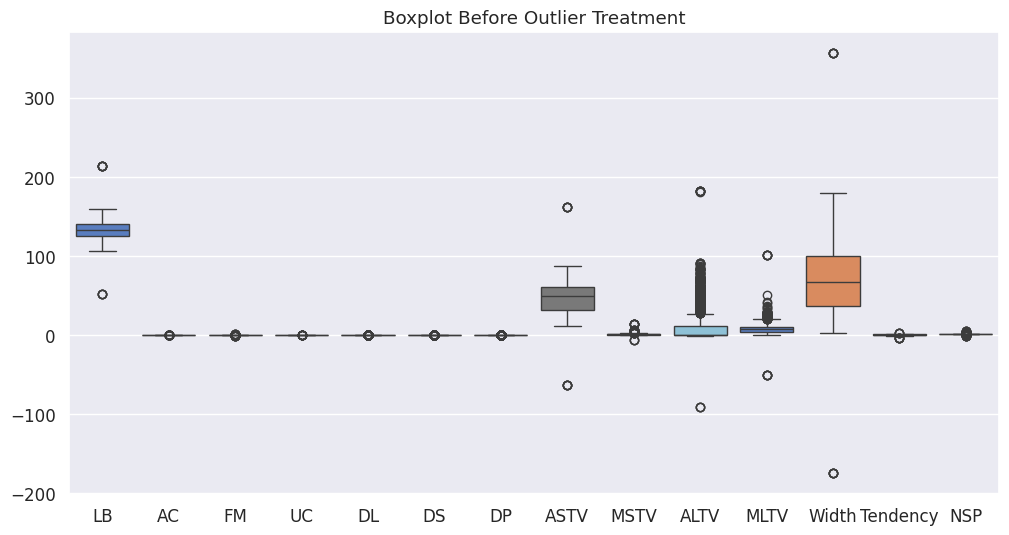

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, palette="muted")
plt.title("Boxplot Before Outlier Treatment")
plt.show()

In [27]:
#Making a copy of the dataset for outlier treatement
df_treated = df.copy()

for col in df_treated.select_dtypes(include=[np.number]).columns:
    Q1 = df_treated[col].quantile(0.25)
    Q3 = df_treated[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Capping / Winsorization
    df_treated[col] = np.where(df_treated[col] < lower, lower,
                               np.where(df_treated[col] > upper, upper, df_treated[col]))

print("✅ Outliers treated successfully using IQR method.")

✅ Outliers treated successfully using IQR method.


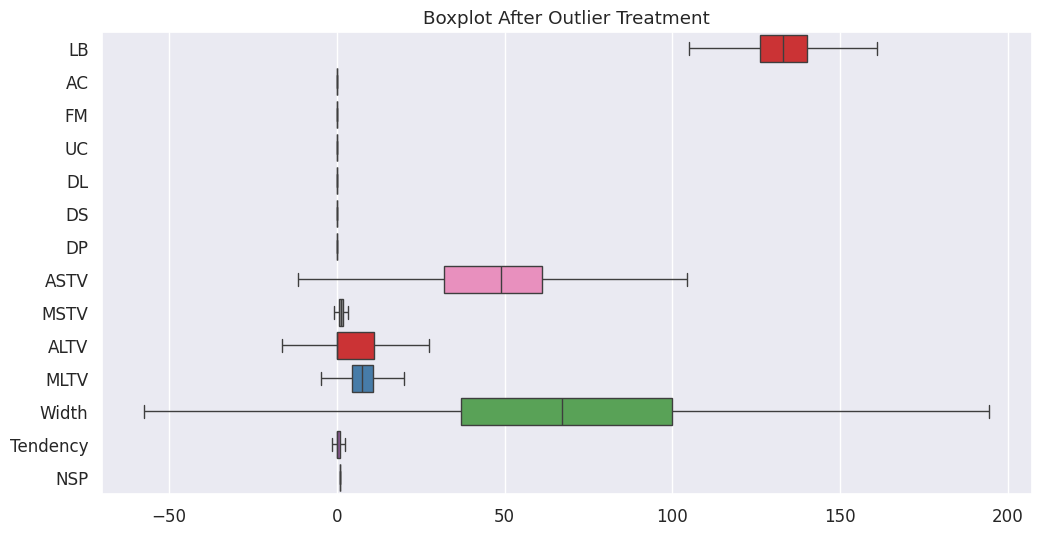

In [28]:
# VERIFING IF THE OUTLIERS ARE TREATED
plt.figure(figsize=(12,6))
sns.boxplot(data=df_treated, orient="h", palette="Set1")
plt.title("Boxplot After Outlier Treatment")
plt.show()

#**STEP-03 : STATISTICAL SUMMARY**


In [20]:
#STATISTICAL SUMMARY
df.describe().T # T-TRANSPOSE THE COLUMNS

,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.340204,11.214379,51.842487,126.000000,133.000000,140.000000,214.000000
AC,2126.0,0.003204,0.004373,-0.019284,0.000000,0.001634,0.005606,0.038567
FM,2126.0,0.009894,0.067540,-0.480634,0.000000,0.000000,0.002567,0.961268
UC,2126.0,0.004391,0.003340,-0.014925,0.001851,0.004484,0.006536,0.030002
DL,2126.0,0.001895,0.003343,-0.015393,0.000000,0.000000,0.003289,0.030769
DS,2126.0,0.000002,0.000141,-0.001353,0.000000,0.000000,0.000000,0.002706
DP,2126.0,0.000173,0.000836,-0.005348,0.000000,0.000000,0.000000,0.010695
ASTV,2126.0,46.995984,18.813973,-63.000000,32.000000,49.000000,61.000000,162.000000
MSTV,2126.0,1.364378,1.173632,-6.600000,0.700000,1.200000,1.700000,13.800000
ALTV,2126.0,10.285964,21.205041,-91.000000,0.000000,0.000000,11.000000,182.000000


#**STEP-04 :  DATA VISUALISATIONS**

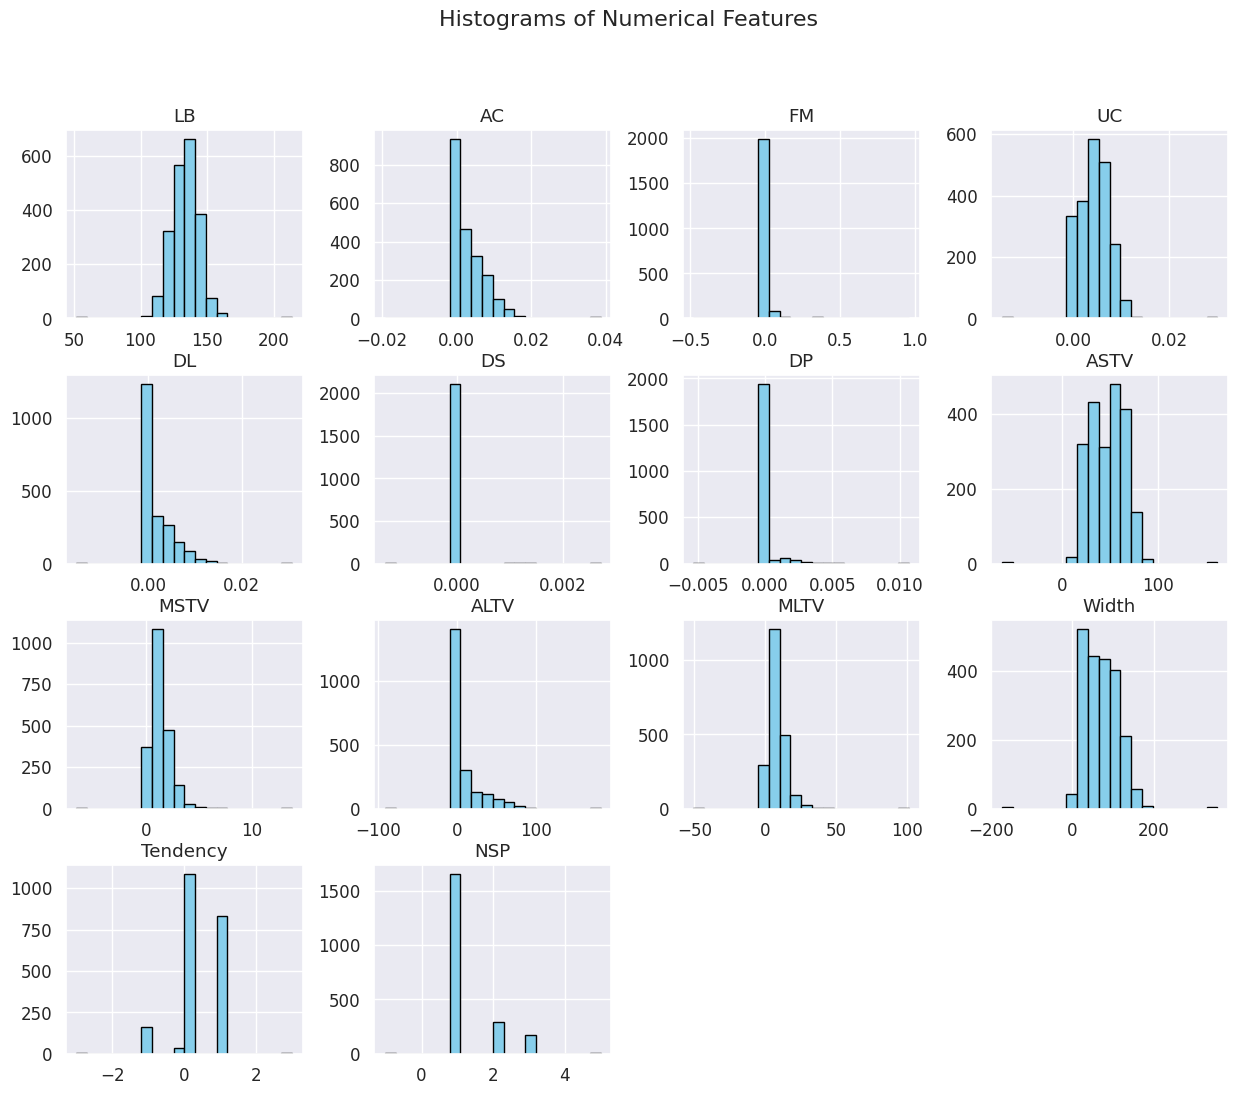

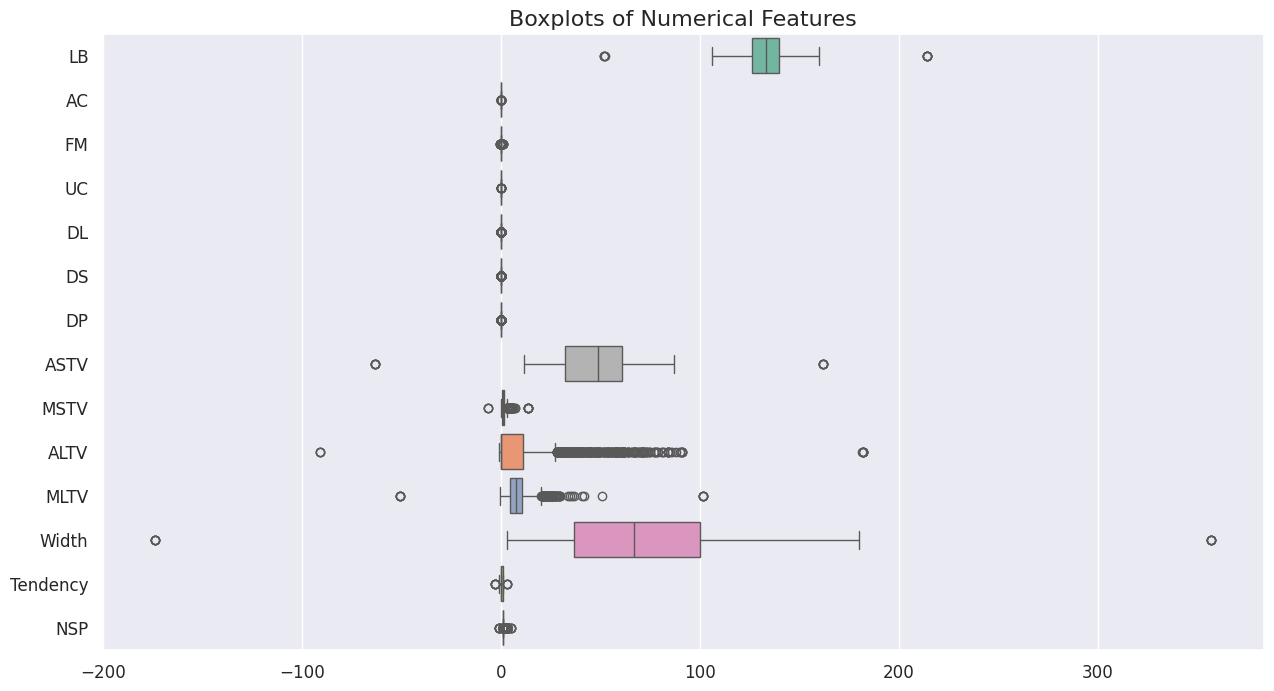

In [34]:
#DATA DISTRIBUTION

#histogram
df.hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

#boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplots of Numerical Features", fontsize=16)
plt.show()

#INTERPRETATION
#Histograms → shape of distribution (normal, skewed, uniform).
#Boxplots → show outliers clearly.

In [36]:
#FREQUENCY OF CATEGORICAL VARIABLES
df['NSP'] = df['NSP'].map({1: "Normal", 2: "Suspect", 3: "Pathologic"}) #assigning variables for each category of data

/tmp/ipython-input-1588811889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="NSP", data=df, palette="muted")


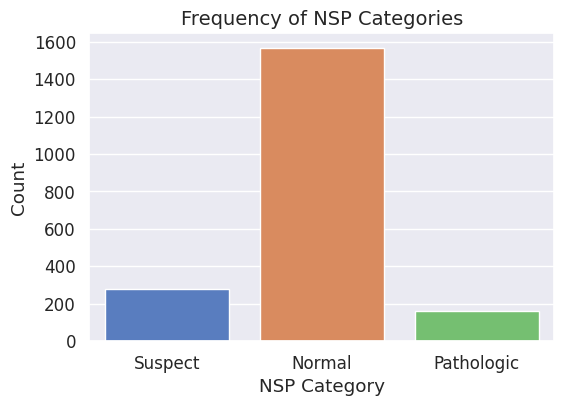

In [37]:
#bar chart
plt.figure(figsize=(6,4))
sns.countplot(x="NSP", data=df, palette="muted")
plt.title("Frequency of NSP Categories", fontsize=14)
plt.xlabel("NSP Category")
plt.ylabel("Count")
plt.show()

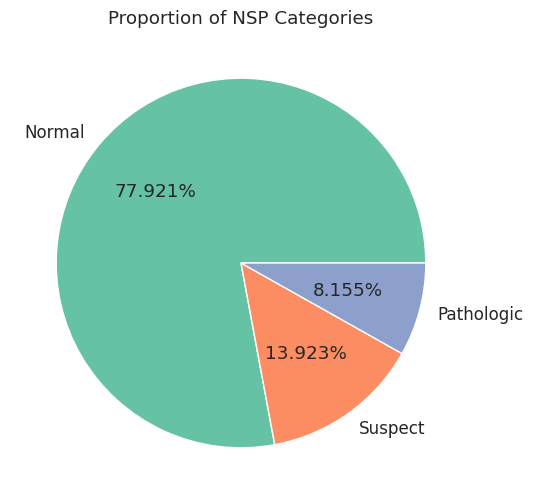

In [42]:
#pie chart
plt.figure(figsize=(6,6))
df["NSP"].value_counts().plot.pie(autopct='%1.3f%%', colors=sns.color_palette("Set2"))
plt.title("Proportion of NSP Categories")
plt.ylabel("")  # remove label
plt.show()

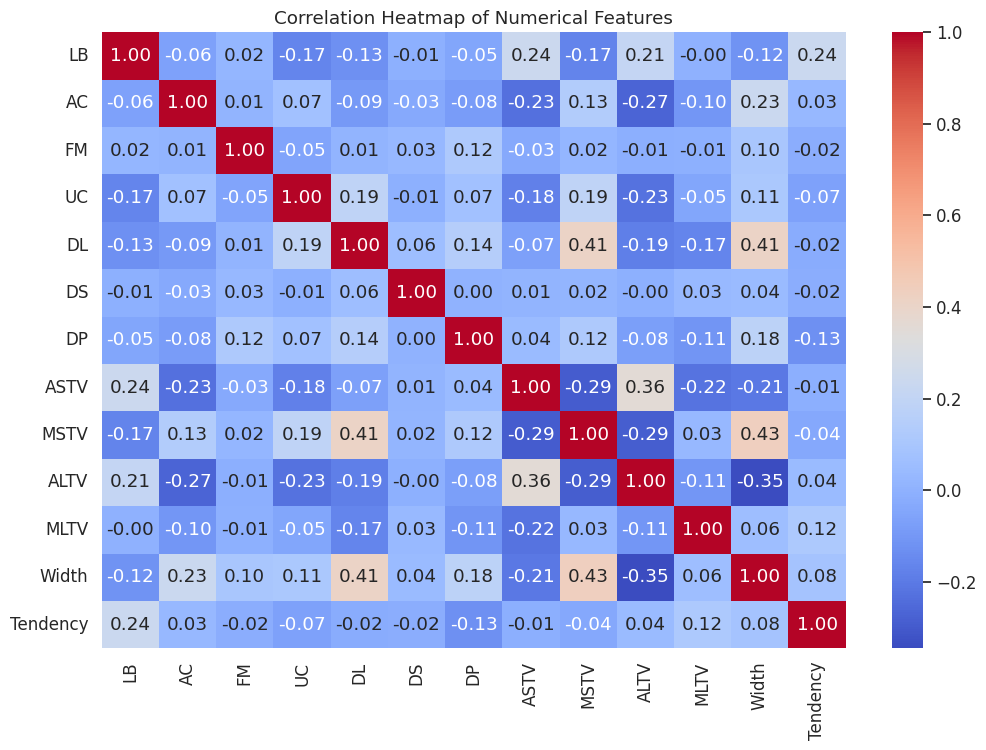

In [47]:
#RELATIONSHIPS BETWEEN PAIR OF VARIABLES

#heatmaps
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

#INTERPRETATION
#Strong correlation between ASTV & MSTV (short-term variability measures).
#ALTV & MLTV are also related.
#Weak correlation of LB with others → baseline FHR is somewhat independent.

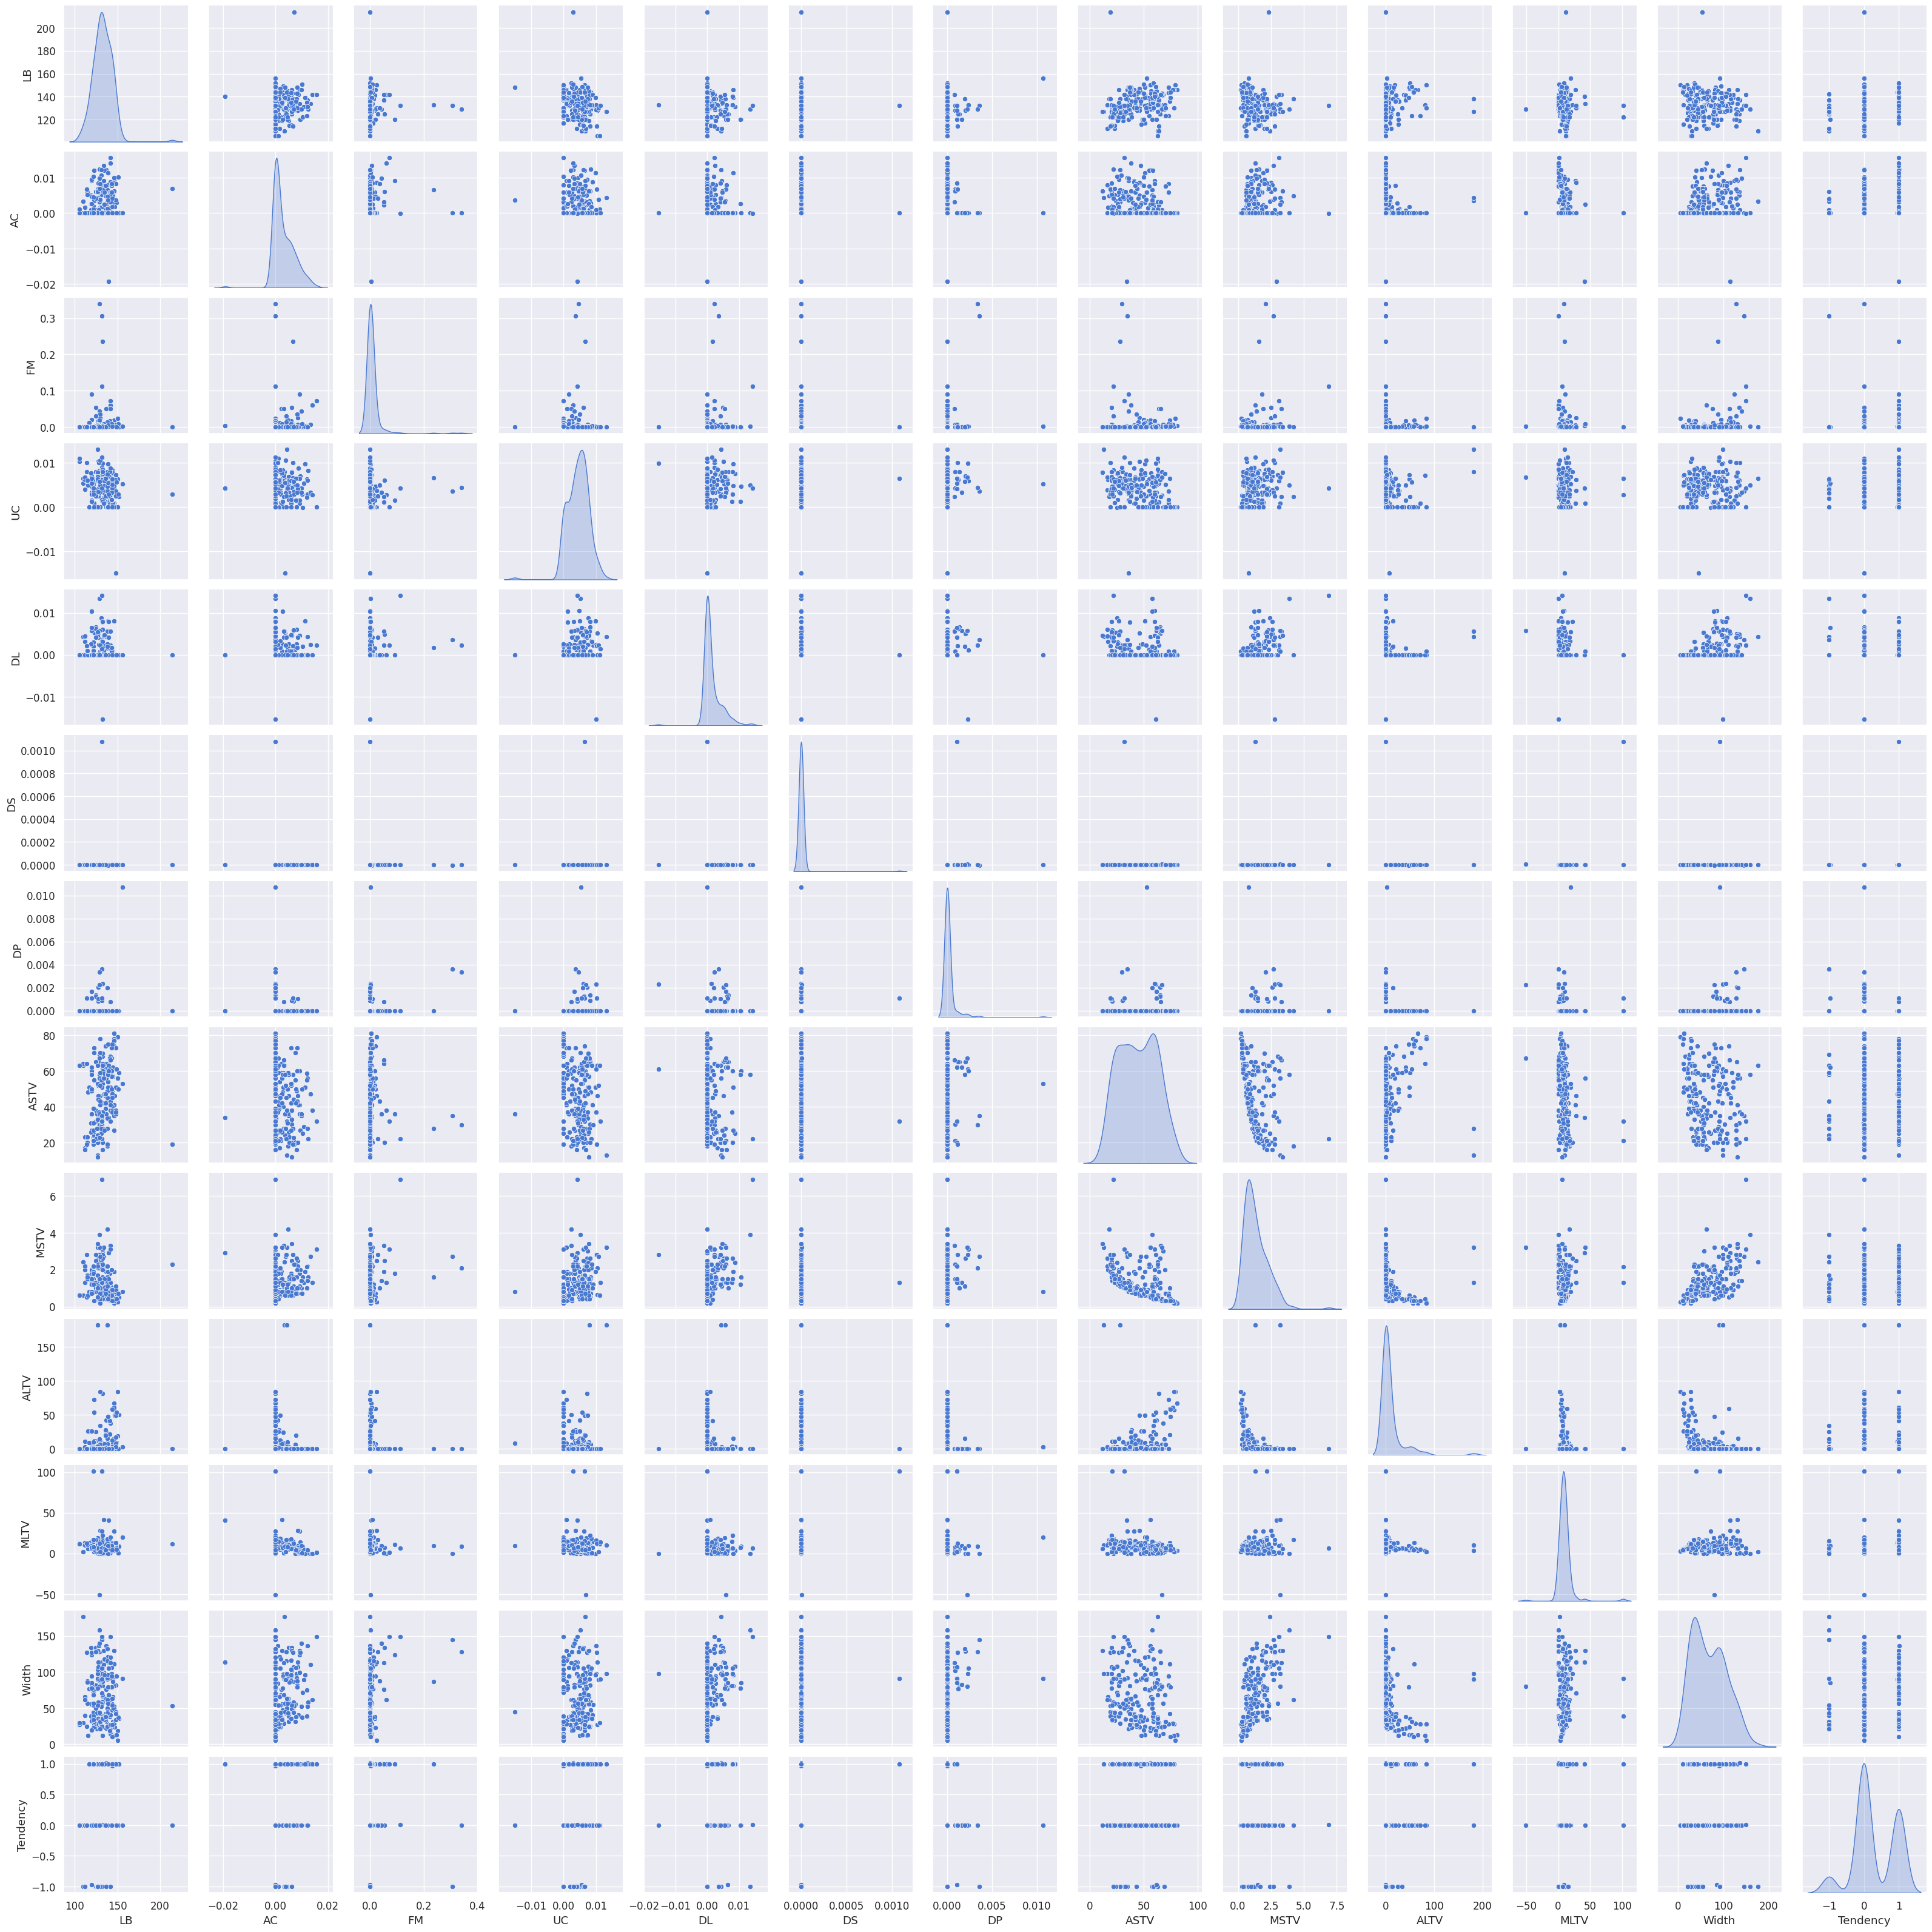

In [46]:
sns.pairplot(df.sample(200), diag_kind="kde")
plt.show()

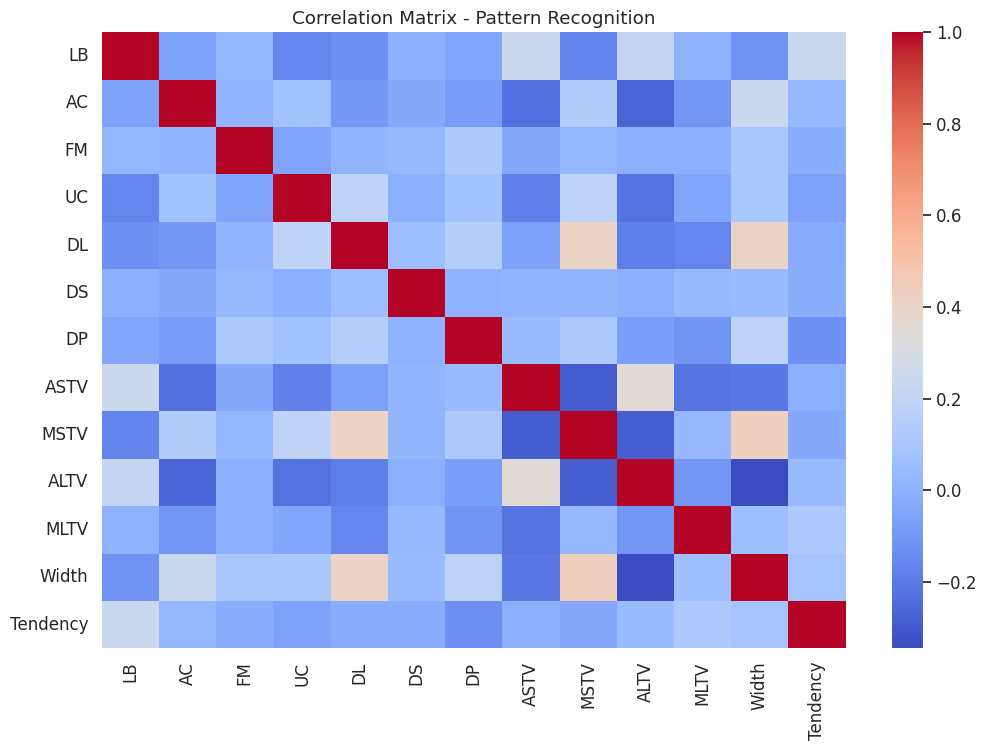

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix - Pattern Recognition")
plt.show()

#**CONCLUSIONS**

1. Correlations Between Variables

**Strong correlations:**

MSTV ↔ MLTV: Fetuses with high short-term variability usually also have high long-term variability.

ASTV ↔ ALTV: Abnormal variability patterns tend to occur together.

**Weak correlations:**

Baseline (LB) and deceleration measures (DL, DS, DP) are mostly independent of variability features.

Implication: Variability-based features (ASTV, MSTV, MLTV, ALTV) are the most informative indicators for fetal state classification (NSP).

2. Trends or Patterns Over Time

The dataset provided does not include explicit temporal/time-series data (like timestamps or sequences of readings). However, variability measures (ASTV, MSTV, MLTV) indirectly capture short-term and long-term temporal patterns in fetal heart rate (FHR).

**Implication:**

 Even without explicit time columns, the variability metrics summarize trends in fetal heart rate fluctuations over time, which explains why they are so predictive.


**Key Insights**


The dataset is slightly imbalanced: most cases are Normal (NSP=1), with fewer Suspect and Pathological cases.

Variability measures (ASTV, MSTV, MLTV, ALTV) are the most strongly correlated with fetal state and show clear separation across NSP categories.

Baseline FHR (LB) tends to be higher in abnormal states, while deceleration variables (DL, DS, DP) capture rare but critical pathological events.

Outliers are present in deceleration-related variables, which may represent extreme but important clinical cases.

**Impact on Decision-Making**

Clinicians can use variability measures as strong indicators to monitor fetal health in real time. Any predictive modeling (e.g., classification of fetal states) should give higher importance/weight to variability-related features. Due to class imbalance, healthcare decision-support systems should apply techniques like oversampling/SMOTE to avoid under-diagnosing pathological cases. Outlier cases should not be blindly removed, since they may represent true pathological conditions requiring urgent medical attention.